## 1. Import packages

In [83]:
# import libraries
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import datetime as dt
pd.set_option('display.float_format', lambda x: '%.5f' % x)
plt.style.use('bmh')

## 2. Read the data

In [5]:
raw_data = pd.read_csv('customerData.csv')
raw_data.head()

,Unnamed: 0,customerID,date,paymentMethod,ticketNumber,ticketNumberDetail,value,discount,createdBy,custCreationDate,...,itemLine,itemSubline,itemRegulated,itemApplications,itemLevel,storeID,dayOfYear,dayOfWeek,yearMonth,dayName
0,996,NaN,2021-06-11,NaN,183C93C6-08CB-EB11-B636-AC82478FB6A9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10,162,6,2021-06,Friday
1,998,NaN,2021-06-11,NaN,A938A208-09CB-EB11-B638-AC82478FA8AD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10,162,6,2021-06,Friday
2,1002,26557317,2021-06-11,CON,916A5D76-B4CA-EB11-B636-AC82478FB6A9,7AC93ADA-B4CA-EB11-B636-AC82478FB6A9,51100.0,0.0,victor,2013-01-26 00:00:00.000,...,VITAMINAS Y MINERALES,FOSFORO PREPARACIONES,NO,GANADERÍA BOVINA,GAMA BAJA,10,162,6,2021-06,Friday
3,1003,26557317,2021-06-11,CON,916A5D76-B4CA-EB11-B636-AC82478FB6A9,D44DFE12-B5CA-EB11-B636-AC82478FB6A9,1.0,0.0,victor,2013-01-26 00:00:00.000,...,IMPLEMENTOS VARIOS,NaN,NO,CONSUMO,GAMA BAJA,10,162,6,2021-06,Friday
4,1004,2041175771,2021-06-11,CON,B3267A6E-B8CA-EB11-B636-AC82478FB6A9,B4267A6E-B8CA-EB11-B636-AC82478FB6A9,4000.0,0.0,victor,2021-03-18 00:00:00.000,...,ALIMENTO PARA PERROS,SNACKS,NO,MASCOTAS,GAMA MEDIA,10,162,6,2021-06,Friday


## 3. Checking data types and non-null rows

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538421 entries, 0 to 538420
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          538421 non-null  int64  
 1   customerID          534112 non-null  object 
 2   date                538421 non-null  object 
 3   paymentMethod       535527 non-null  object 
 4   ticketNumber        538421 non-null  object 
 5   ticketNumberDetail  535525 non-null  object 
 6   value               535525 non-null  float64
 7   discount            535525 non-null  float64
 8   createdBy           535525 non-null  object 
 9   custCreationDate    534112 non-null  object 
 10  idType              534112 non-null  object 
 11  birthDate           534112 non-null  object 
 12  custCity            534102 non-null  float64
 13  custHood            3351 non-null    object 
 14  custEmail           40370 non-null   object 
 15  gender              534112 non-nul

## 4. Select useful columns and change types

In [ ]:
sales_data = raw_data[['customerID','date','ticketNumber','value','discount','itemID','itemGroup','businessUnit','itemLine','itemApplications','itemLevel','storeID','yearMonth','dayName']]
sales_data.date = pd.to_datetime(sales_data.date)
sales_data.itemID = sales_data.itemID.astype(str)
sales_data.storeID = sales_data.storeID.astype(str)
sales_data['year'] = pd.to_datetime(sales_data.yearMonth).dt.strftime('%Y')
sales_data.yearMonth = pd.to_datetime(sales_data.yearMonth)
sales_data.head(5)

In [ ]:
sales_data.info()

## 5. Dropping the duplicate rows

In [ ]:
sales_data = sales_data.drop_duplicates().reset_index(drop=True)
sales_data.head(5)

In [ ]:
sales_data.shape

## 6. Dropping the missing or null values.

In [ ]:
print(sales_data.isnull().sum())

In [ ]:
# Dropping the missing values.
sales_data = sales_data.dropna()
sales_data.count()

## 7. Detecting Outliers

In [ ]:
sns.boxplot(x=sales_data['value'])
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

## 8. Export clean data

In [ ]:
sales_data.to_pickle("cleanCustomerData.pkl")

## 9. Machine Learning Model  

In [3]:
# Read clean data
sales_data = pd.read_pickle("cleanCustomerData.pkl")
sales_data.head()

,customerID,date,ticketNumber,value,discount,itemID,itemGroup,businessUnit,itemLine,itemApplications,itemLevel,storeID,yearMonth,dayName,year
2,26557317,2021-06-11,916A5D76-B4CA-EB11-B636-AC82478FB6A9,51100.0,0.0,746.0,FARMACEUTICOS,AGROPECUARIO,VITAMINAS Y MINERALES,GANADERÍA BOVINA,GAMA BAJA,10,2021-06-01,Friday,2021
3,26557317,2021-06-11,916A5D76-B4CA-EB11-B636-AC82478FB6A9,1.0,0.0,7530.0,LINEA VARIOS,CONSUMO,IMPLEMENTOS VARIOS,CONSUMO,GAMA BAJA,10,2021-06-01,Friday,2021
4,2041175771,2021-06-11,B3267A6E-B8CA-EB11-B636-AC82478FB6A9,4000.0,0.0,8657.0,ALIMENTOS CONCENTRADOS,MASCOTAS,ALIMENTO PARA PERROS,MASCOTAS,GAMA MEDIA,10,2021-06-01,Friday,2021
5,2041175771,2021-06-11,B3267A6E-B8CA-EB11-B636-AC82478FB6A9,1.0,0.0,7530.0,LINEA VARIOS,CONSUMO,IMPLEMENTOS VARIOS,CONSUMO,GAMA BAJA,10,2021-06-01,Friday,2021
6,2041175771,2021-06-11,B3267A6E-B8CA-EB11-B636-AC82478FB6A9,45524.0,0.0,6791.0,ALIMENTOS CONCENTRADOS,MASCOTAS,ALIMENTO PARA PERROS,MASCOTAS,GAMA ALTA,10,2021-06-01,Friday,2021


### Propuesta
Para la parte de la prueba referente a diseñar un modelo de machine learning, se propone realizar una segmentación de clientes usando el algoritmo K-Means.
No se afirma que este algoritmo sea el mejor para los datos con los que se cuenta, pero según la literatura es el más facil y común que se usa.

**Assumption:** Since no other information is given, it will be assumed that the customerID of each client should only be a numeric combination without spaces or special characters. Therefore all other values will be omited for the model.

In [30]:
# Filter out customers without a standard ID
customer_data = sales_data[sales_data.customerID.str.match("\d+\.*")]
customer_data

,customerID,date,ticketNumber,value,discount,itemID,itemGroup,businessUnit,itemLine,itemApplications,itemLevel,storeID,yearMonth,dayName,year
2,26557317,2021-06-11,916A5D76-B4CA-EB11-B636-AC82478FB6A9,51100.0,0.0,746.0,FARMACEUTICOS,AGROPECUARIO,VITAMINAS Y MINERALES,GANADERÍA BOVINA,GAMA BAJA,10,2021-06-01,Friday,2021
3,26557317,2021-06-11,916A5D76-B4CA-EB11-B636-AC82478FB6A9,1.0,0.0,7530.0,LINEA VARIOS,CONSUMO,IMPLEMENTOS VARIOS,CONSUMO,GAMA BAJA,10,2021-06-01,Friday,2021
4,2041175771,2021-06-11,B3267A6E-B8CA-EB11-B636-AC82478FB6A9,4000.0,0.0,8657.0,ALIMENTOS CONCENTRADOS,MASCOTAS,ALIMENTO PARA PERROS,MASCOTAS,GAMA MEDIA,10,2021-06-01,Friday,2021
5,2041175771,2021-06-11,B3267A6E-B8CA-EB11-B636-AC82478FB6A9,1.0,0.0,7530.0,LINEA VARIOS,CONSUMO,IMPLEMENTOS VARIOS,CONSUMO,GAMA BAJA,10,2021-06-01,Friday,2021
6,2041175771,2021-06-11,B3267A6E-B8CA-EB11-B636-AC82478FB6A9,45524.0,0.0,6791.0,ALIMENTOS CONCENTRADOS,MASCOTAS,ALIMENTO PARA PERROS,MASCOTAS,GAMA ALTA,10,2021-06-01,Friday,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533701,97037570,2020-05-29,C5E61F8C-E6A1-EA11-9EB5-4437E6EC175B,31200.0,0.0,2673.0,FARMACEUTICOS,MASCOTAS,BIOLOGICOS,MASCOTAS,GAMA ALTA,16,2020-05-01,Friday,2020
533702,97037570,2020-05-29,C5E61F8C-E6A1-EA11-9EB5-4437E6EC175B,14400.0,0.0,1136.0,FARMACEUTICOS,MASCOTAS,ANTIPARASITARIOS,MASCOTAS,GAMA ALTA,16,2020-05-01,Friday,2020
533703,2370081019,2020-05-29,292B4AD6-E6A1-EA11-9EB5-4437E6EC175B,18700.0,0.0,2674.0,FARMACEUTICOS,MASCOTAS,BIOLOGICOS,MASCOTAS,GAMA ALTA,16,2020-05-01,Friday,2020
533704,2370081019,2020-05-29,292B4AD6-E6A1-EA11-9EB5-4437E6EC175B,4100.0,0.0,5403.0,FARMACEUTICOS,MASCOTAS,ANTIPARASITARIOS,MASCOTAS,GAMA ALTA,16,2020-05-01,Friday,2020


In [67]:
def count_categories():
    unique_customers = numberTickets.index.to_list()
    lowLevel = pd.Series(0,index=numberTickets.index.to_list())
    midLevel = pd.Series(0,index=numberTickets.index.to_list())
    highLevel = pd.Series(0,index=numberTickets.index.to_list())
    
    for customer in unique_customers:
        df_customer = customer_data[customer_data.customerID == customer]

        itemLevel = df_customer.itemLevel.value_counts().to_dict()
        for key,value in itemLevel.items():
            if key == 'GAMA BAJA':
                lowLevel.loc[str(customer)] = value
            if key == 'GAMA MEDIA':
                midLevel.loc[str(customer)] = value
            else:
                highLevel.loc[str(customer)] = value                
    return lowLevel, midLevel, highLevel

In [34]:
numberTickets = customer_data.groupby(['customerID'])["ticketNumber"].count()
amountPaid = customer_data.groupby(['customerID'])["value"].sum()
totalDiscount = customer_data.groupby(['customerID'])["discount"].sum()
lowLevel, midLevel, highLevel = count_categories()

customerID
0000321116       0.0
00018720         0.0
0001985986       0.0
000219517        0.0
0002301570       0.0
               ...  
9998055          0.0
99989136      2291.0
9999256       2729.0
9999294          0.0
99997257         0.0
Name: discount, Length: 17050, dtype: float64

Let's select the variables that could be useful for the model

In [86]:
X = pd.concat([numberTickets,amountPaid,totalDiscount,lowLevel,midLevel,highLevel],axis=1 )
X.columns = ["NumberTickets","TotalPayment","TotalDiscount","LowItems","MidItems","HighItems"]
X

,NumberTickets,TotalPayment,TotalDiscount,LowItems,MidItems,HighItems
0000321116,11,674981.00000,0.00000,4,2,4
00018720,1,7143.00000,0.00000,1,0,1
0001985986,1,60381.00000,0.00000,0,1,0
000219517,2,17090.00000,0.00000,1,0,1
0002301570,1,32100.00000,0.00000,0,0,1
...,...,...,...,...,...,...
9998055,6,356896.00000,0.00000,2,2,2
99989136,8,988062.00000,2291.00000,3,1,3
9999256,4,70404.00000,2729.00000,0,0,4
9999294,15,180036.00000,0.00000,3,10,2


Let's scale the variables before training the model

In [87]:
X_st = preprocessing.scale(X)
X_st = pd.DataFrame(X_st, columns=X.columns)
X_st.index = X.index
X_st

,NumberTickets,TotalPayment,TotalDiscount,LowItems,MidItems,HighItems
0000321116,0.17123,0.48531,-0.10747,0.15332,-0.07676,0.44074
00018720,-0.38357,-0.36079,-0.10747,-0.25109,-0.37811,-0.32802
0001985986,-0.38357,-0.29334,-0.10747,-0.38590,-0.22743,-0.58428
000219517,-0.32809,-0.34819,-0.10747,-0.25109,-0.37811,-0.32802
0002301570,-0.38357,-0.32917,-0.10747,-0.38590,-0.37811,-0.32802
...,...,...,...,...,...,...
9998055,-0.10617,0.08232,-0.10747,-0.11629,-0.07676,-0.07177
99989136,0.00479,0.88196,0.14718,0.01852,-0.22743,0.18449
9999256,-0.21713,-0.28064,0.19587,-0.38590,-0.37811,0.44074
9999294,0.39316,-0.14175,-0.10747,0.01852,1.12863,-0.07177


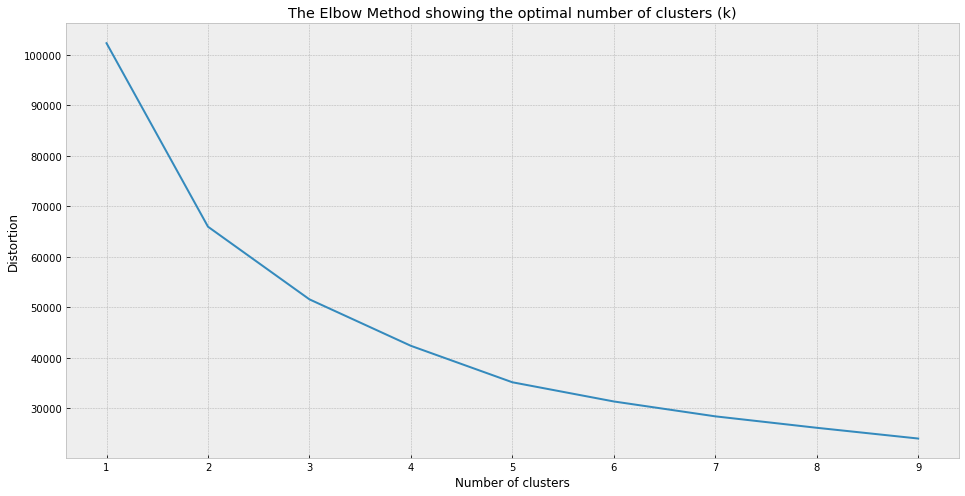

In [88]:
# Create Elbow Plot

w = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_st)
    w.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, w)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')

plt.show()

Como se puede ver en la grafica, el K optimo se encuentra aproximadamente en 4, así que se usará ese valor para el modelo.

In [89]:
# Apply KMeans 
kmean = KMeans(n_clusters=4)

kmean.fit(X_st)
y_pred = kmean.fit_predict(X_st)
X['ClusterLabel'] = y_pred
X

,NumberTickets,TotalPayment,TotalDiscount,LowItems,MidItems,HighItems,ClusterLabel
0000321116,11,674981.00000,0.00000,4,2,4,0
00018720,1,7143.00000,0.00000,1,0,1,0
0001985986,1,60381.00000,0.00000,0,1,0,0
000219517,2,17090.00000,0.00000,1,0,1,0
0002301570,1,32100.00000,0.00000,0,0,1,0
...,...,...,...,...,...,...,...
9998055,6,356896.00000,0.00000,2,2,2,0
99989136,8,988062.00000,2291.00000,3,1,3,0
9999256,4,70404.00000,2729.00000,0,0,4,0
9999294,15,180036.00000,0.00000,3,10,2,0


### Cluster 0

In [97]:
cluster0 = X[X.ClusterLabel == 0]
print(cluster0.NumberTickets.describe())
print(cluster0.TotalPayment.describe())
print(cluster0.TotalDiscount.describe())

count   16059.00000
mean        4.96401
std         5.17513
min         1.00000
25%         2.00000
50%         3.00000
75%         6.00000
max        47.00000
Name: NumberTickets, dtype: float64
count     16059.00000
mean     170931.94769
std      254957.99344
min           0.00000
25%       34901.00000
50%       81400.00000
75%      197247.50000
max     3844858.00000
Name: TotalPayment, dtype: float64
count    16059.00000
mean       431.52120
std       3411.96800
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max     113960.00000
Name: TotalDiscount, dtype: float64


### Cluster 1

In [98]:
cluster1 = X[X.ClusterLabel == 1]
print(cluster1.NumberTickets.describe())
print(cluster1.TotalPayment.describe())
print(cluster1.TotalDiscount.describe())

count    17.00000
mean     54.41176
std      51.85805
min       3.00000
25%      12.00000
50%      37.00000
75%      98.00000
max     155.00000
Name: NumberTickets, dtype: float64
count         17.00000
mean     6488959.41176
std      4995101.12225
min       330200.00000
25%      2712300.00000
50%      5800221.00000
75%      7479796.00000
max     20374631.00000
Name: TotalPayment, dtype: float64
count       17.00000
mean    223529.94118
std      72482.27318
min     128118.00000
25%     177504.00000
50%     227920.00000
75%     281075.00000
max     400370.00000
Name: TotalDiscount, dtype: float64


### Cluster 2

In [99]:
cluster2 = X[X.ClusterLabel == 2]
print(cluster2.NumberTickets.describe())
print(cluster2.TotalPayment.describe())
print(cluster2.TotalDiscount.describe())

count    46.00000
mean    225.34783
std     132.03454
min     122.00000
25%     144.50000
50%     178.50000
75%     239.00000
max     783.00000
Name: NumberTickets, dtype: float64
count         46.00000
mean     6244642.71739
std      4121530.30829
min      1309551.00000
25%      3735936.25000
50%      4747783.50000
75%      8165472.50000
max     23228492.00000
Name: TotalPayment, dtype: float64
count       46.00000
mean     21106.65217
std      29680.68572
min          0.00000
25%       1112.50000
50%       8754.50000
75%      24671.00000
max     125453.00000
Name: TotalDiscount, dtype: float64


### Cluster 3

In [100]:
cluster3 = X[X.ClusterLabel == 3]
print(cluster3.NumberTickets.describe())
print(cluster3.TotalPayment.describe())
print(cluster3.TotalDiscount.describe())

count   928.00000
mean     47.32651
std      22.96275
min       2.00000
25%      32.00000
50%      41.00000
75%      56.00000
max     163.00000
Name: NumberTickets, dtype: float64
count        928.00000
mean     1976993.25539
std      1875839.47093
min        50193.00000
25%       809488.00000
50%      1399405.50000
75%      2430276.00000
max     18267661.00000
Name: TotalPayment, dtype: float64
count      928.00000
mean      5155.41487
std      14232.09330
min          0.00000
25%          0.00000
50%          0.00000
75%       2625.00000
max     107294.00000
Name: TotalDiscount, dtype: float64


## Conclusions

- Los clientes del cluster 2 son los que más transacciones hacen con un promedio de 225.
- A pesar de que los clientes del cluster 1 no son los que hacen más cantidad de transacciones en comparación, sí son los que pagan mayor cantidad de dinero en lo que compran con un promedio de $6.4M.
- Los clientes del cluster 3 tienen una combinación de pago total y cantidad de transacciones a un nivel intermedio en comparación, pero con un descuento promedio bastante bajo. Una estrategia podría ser darles más descuentos como incentivos para que se motiven a comprar más.